Objective of this project is to see the most movies and show producing countries,time when the release of movies and shows were at the peak.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [3]:
df= pd.read_csv('netflix_titles.csv')


In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df['country'].value_counts()

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

In [8]:
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [9]:
df['release_year'].value_counts()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

In [10]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [11]:

df['country'].value_counts().iloc[:10]

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

In [12]:
#Filtering out the rows containing  unknown director from dataframe
df[df['director']!='unknown director']['director'].value_counts()

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

In [13]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [14]:
#Filtering out the unknown country from dataframe
df_cleaned=df[df['country']!='unknown country']

In [15]:
df_cleaned.shape

(8807, 12)

In [16]:
top_10_countries=df_cleaned['country'].value_counts().iloc[:10]
top_10_countries

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

/Users/shisirkafle/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shisirkafle/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shisirkafle/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


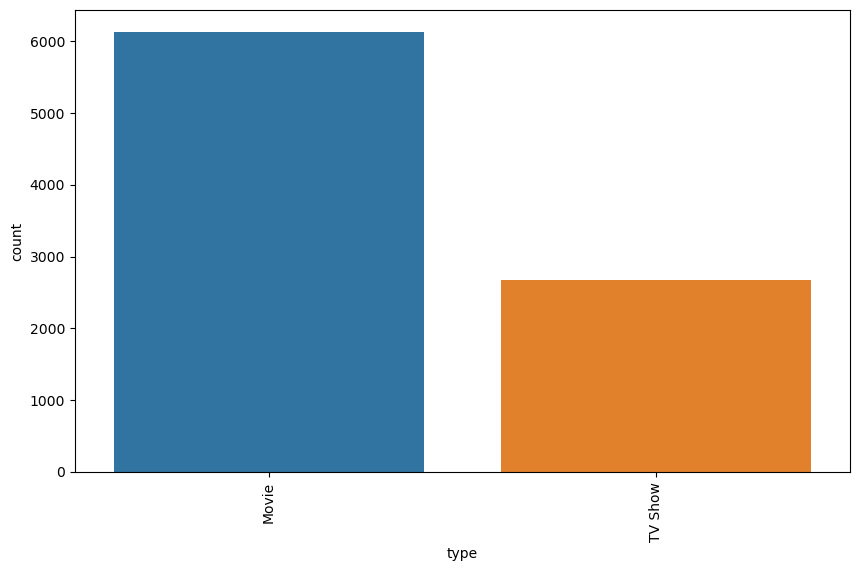

In [17]:
# Count of Tv vs Movie shows
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='type')
plt.xticks(rotation=90)
plt.show()

/Users/shisirkafle/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shisirkafle/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


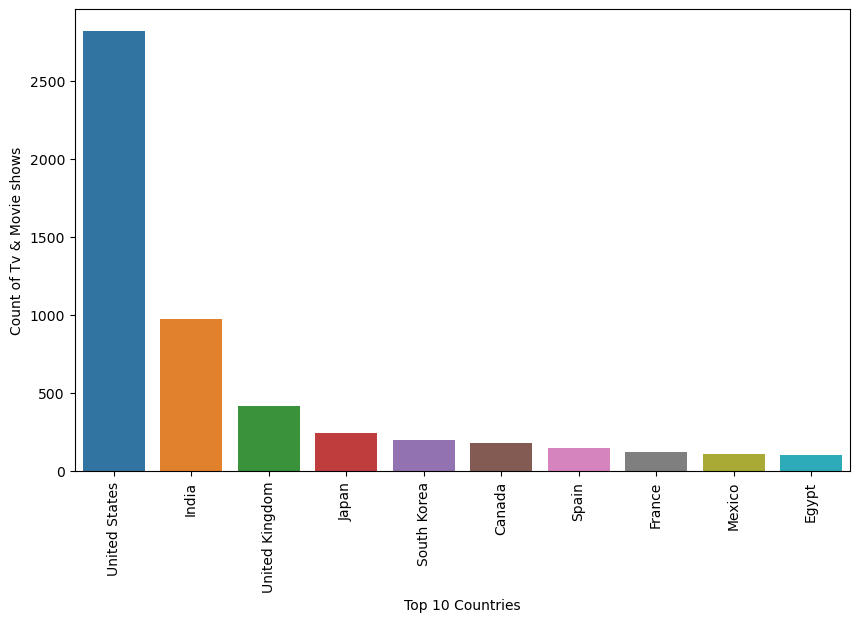

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['country'].isin(top_10_countries.index)],x='country',order=top_10_countries.index)
plt.xticks(rotation=90)
plt.xlabel('Top 10 Countries')
plt.ylabel('Count of Tv & Movie shows')
plt.show()

Insight:
United States, India and UK are the top 3 countries where most of the movies and Tv shows are produced.

In [19]:
top_5_rating=df['rating'].value_counts().iloc[:5]

/Users/shisirkafle/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shisirkafle/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shisirkafle/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


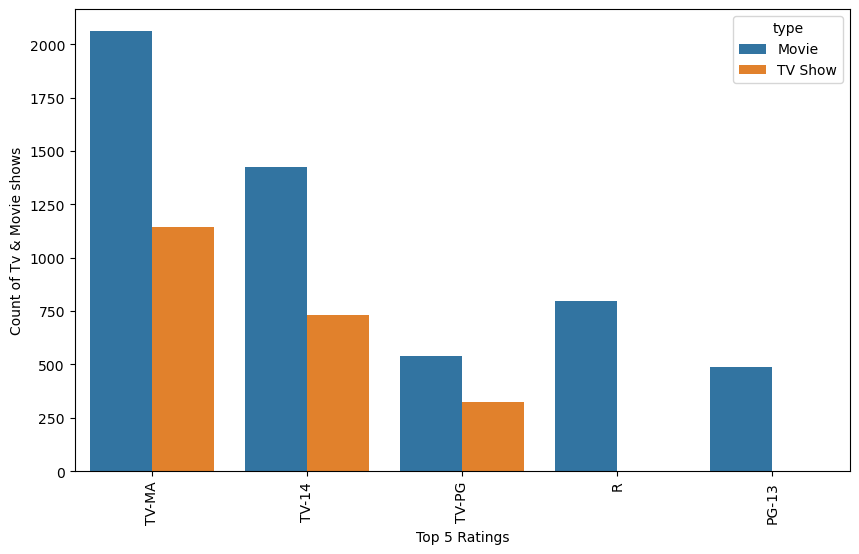

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['rating'].isin(top_5_rating.index)],x='rating',order=top_5_rating.index,hue='type')
plt.xticks(rotation=90)
plt.xlabel('Top 5 Ratings')
plt.ylabel('Count of Tv & Movie shows')
plt.show()

Insights:
Most Netflix shows are rated for mature audiences, like TV-MA, TV-14, and TV-PG.
These ratings signal that the content might have strong language, violence, or adult themes.

TV-14 has mild violence and some mature themes, while TV-PG might have moderate violence and suggestive content.

In [21]:
top_10_directors=df[df['director']!='unknown director']['director'].value_counts().sort_values(ascending=False).iloc[:10]

/Users/shisirkafle/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shisirkafle/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


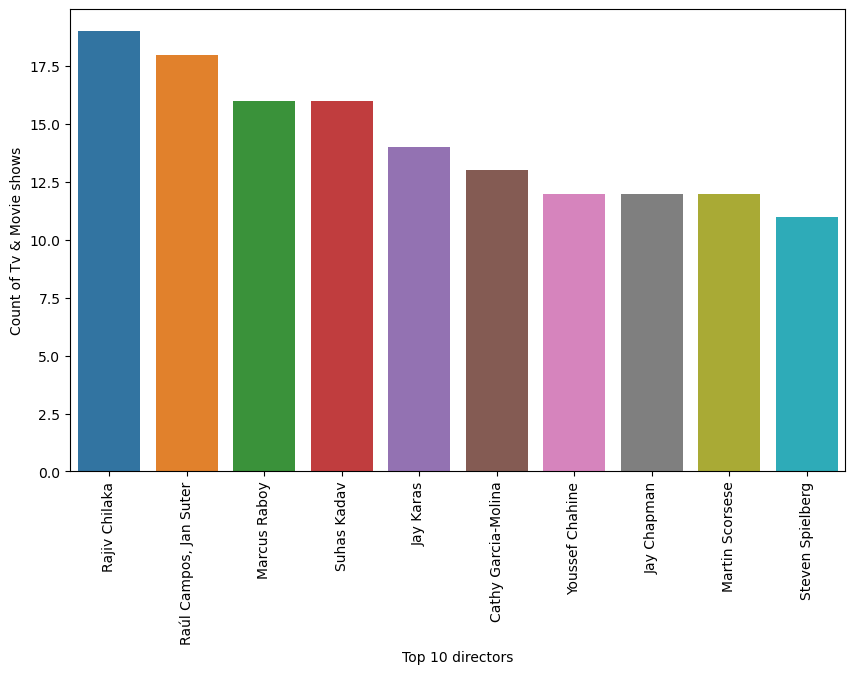

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['director'].isin(top_10_directors.index)],x='director',order=top_10_directors.index)
plt.xticks(rotation=90)
plt.xlabel('Top 10 directors')
plt.ylabel('Count of Tv & Movie shows')
plt.show()

In [23]:
top_10_year=df['release_year'].value_counts().sort_values(ascending=False).iloc[:10]
top_10_year

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: count, dtype: int64

/Users/shisirkafle/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shisirkafle/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


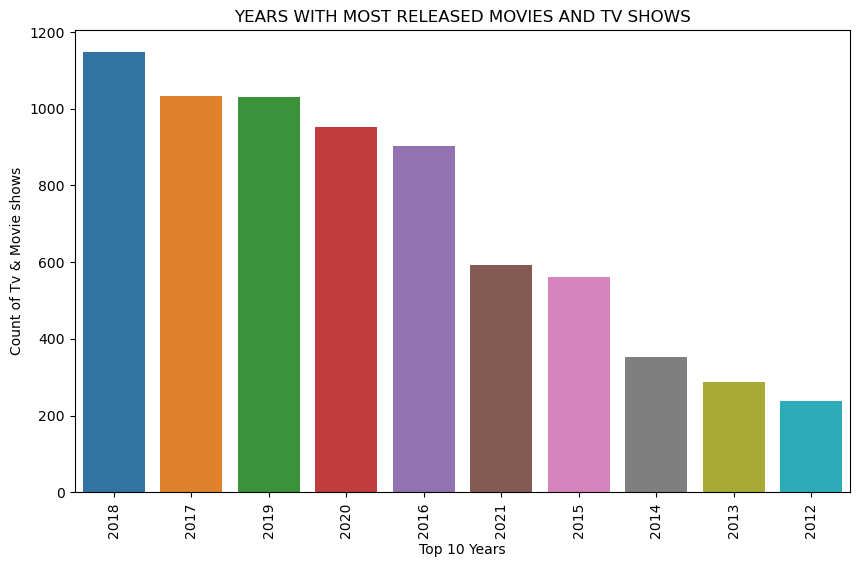

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['release_year'].isin(top_10_year.index)],x='release_year',order=top_10_year.index)
plt.xticks(rotation=90)
plt.xlabel('Top 10 Years')
plt.ylabel('Count of Tv & Movie shows')
plt.title('YEARS WITH MOST RELEASED MOVIES AND TV SHOWS')
plt.show()

Insights:
Most movies and TV Shows in Netflix has released recently in the years between 2016-21.

In [25]:
top_10_country_movies=df_cleaned[df_cleaned['type']=='Movie'].groupby('country').aggregate({'title':'count'}).reset_index().sort_values(by='title',ascending=False).rename(columns={'title':'Count of Movies'}).iloc[:10]
top_10_country_movies

,country,Count of Movies
525,United States,2058
218,India,893
440,United Kingdom,206
50,Canada,122
384,Spain,97
128,Egypt,92
319,Nigeria,86
238,Indonesia,77
428,Turkey,76
278,Japan,76


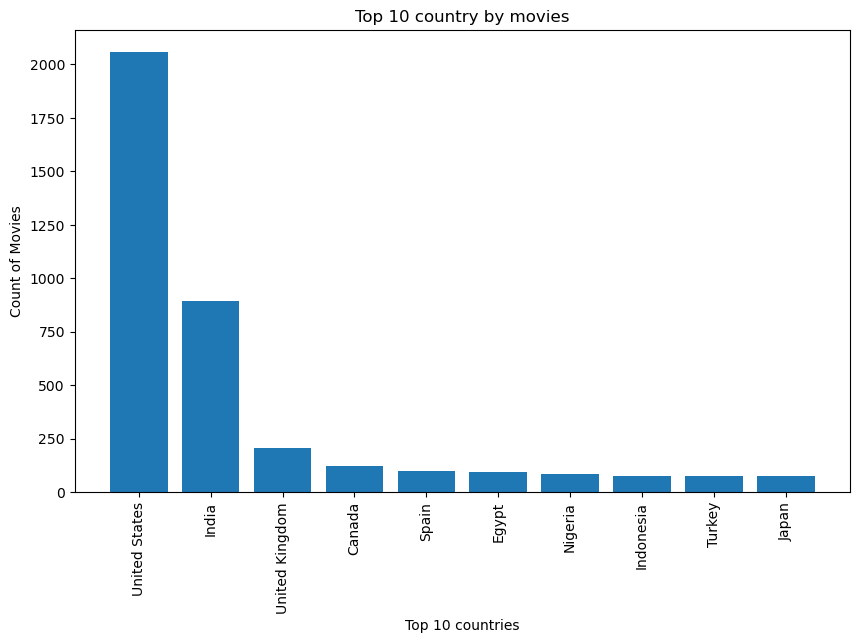

In [26]:
plt.figure(figsize=(10,6))
plt.bar(x=top_10_country_movies['country'],height=top_10_country_movies['Count of Movies'])
plt.xticks(rotation=90)
plt.xlabel('Top 10 countries')
plt.ylabel('Count of Movies')
plt.title('Top 10 country by movies')
plt.show()

Insight:
The United States, India, and the UK stand as the primary three countries producing the highest quantity of Netflix movies.

In [27]:
top_10_country_Tv_show=df_cleaned[df_cleaned['type']=='TV Show'].groupby('country')['title'].count().sort_values(ascending=False).iloc[:10]
top_10_country_Tv_show

country
United States     760
United Kingdom    213
Japan             169
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Australia          48
Spain              48
Name: title, dtype: int64

/Users/shisirkafle/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shisirkafle/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


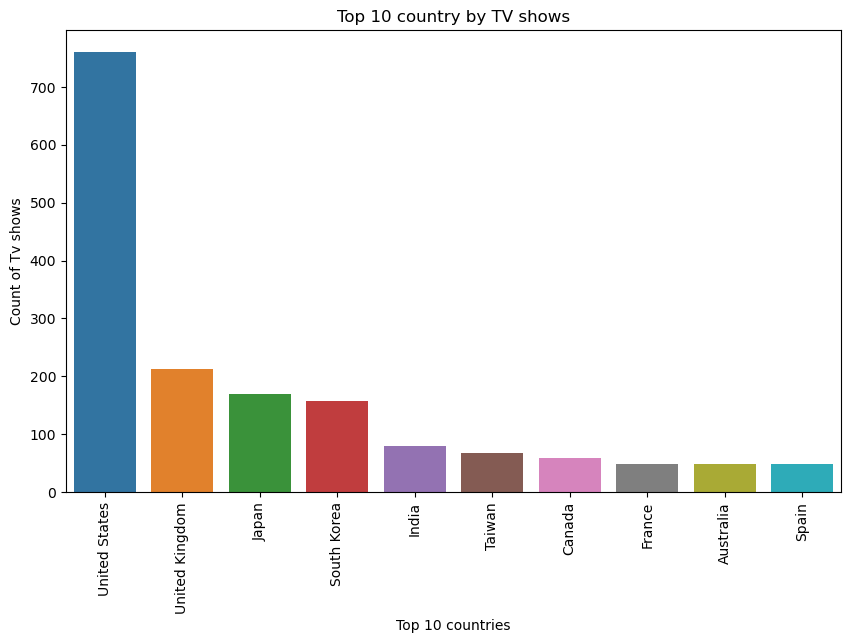

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_country_Tv_show.index,y=top_10_country_Tv_show.values,order=top_10_country_Tv_show.index)
plt.xticks(rotation=90)
plt.xlabel('Top 10 countries')
plt.ylabel('Count of Tv shows')
plt.title('Top 10 country by TV shows')
plt.show()

Insights:

United States , Uk, Japan and South korea are the top 4 producers of TV Shows in Netflix.
India produces less number of Tv shows relative to movies in Netflix

Summarized Recommendations:

Most content on Netflix is rated for adults (TV-MA), indicating a liking for mature, violent, and sexual content. To grow its audience, Netflix could focus more on kid-friendly contents to increase it's customer base.

Best Times to Release: Holidays, especially from November to January, and during the summer in June are great times to launch new content on Netflix.

Most Released Movies and Shows are in 2016 to 2020.

United States , Uk, Japan and South korea are the top 4 producers of TV Shows in Netflix.
